In [12]:
import anndata as ad
import os
from SpatialQuery.spatial_query import spatial_query
from SpatialQuery.spatial_query_multiple_fov import spatial_query_multi
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.max_colwidth', 1000)

In [3]:
data_path = "/Users/sa3520/BWH/spatial query/python/data/"

spatial_key = 'X_spatial'
label_key = 'predicted_label'

In [4]:
adata = ad.read_h5ad(os.path.join(data_path, 'HBM735_FSBZ_626/' + 'secondary_analysis.h5ad'))
adata2 = ad.read_h5ad(os.path.join(data_path, 'secondary_analysis.h5ad'))
adatas = [adata, adata2]
datasets=['dataset_1', 'dataset_2']

In [17]:
adata

AnnData object with n_obs × n_vars = 4058 × 26265
    obs: 'n_genes', 'n_counts', 'leiden', 'umap_density', 'azimuth_label', 'azimuth_id', 'predicted_CLID', 'predicted_label', 'cl_match_type', 'prediction_score'
    var: 'hugo_symbol', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'annotation_metadata', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap', 'umap_density_params'
    obsm: 'X_pca', 'X_spatial', 'X_umap', 'X_umap_proj'
    varm: 'PCs'
    layers: 'spliced', 'spliced_unspliced_sum', 'unscaled', 'unspliced'
    obsp: 'connectivities', 'distances'

In [18]:
adata2

AnnData object with n_obs × n_vars = 8221 × 28266
    obs: 'n_genes', 'n_counts', 'leiden', 'umap_density', 'azimuth_label', 'azimuth_id', 'predicted_CLID', 'predicted_label', 'cl_match_type', 'prediction_score'
    var: 'hugo_symbol', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'annotation_metadata', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap', 'umap_density_params'
    obsm: 'X_pca', 'X_spatial', 'X_umap', 'X_umap_proj'
    varm: 'PCs'
    layers: 'spliced', 'spliced_unspliced_sum', 'unscaled', 'unspliced'
    obsp: 'connectivities', 'distances'

In [5]:
# print('T cell' in adata.obs[label_key].unique())
adata.obs[label_key].to_list().count('kidney interstitial fibroblast')

281

In [6]:
adata.obs[label_key].unique()

['kidney loop of Henle cortical thick ascending limb epithelial cell', 'kidney loop of Henle long descending thin limb outer medulla epithelial cell', 'peritubular capillary endothelial cell', 'kidney inner medulla collecting duct principal cell', 'epithelial cell of proximal tubule segment 3', ..., 'monocyte-derived dendritic cell', 'macula densa epithelial cell', 'T cell', 'kidney connecting tubule alpha-intercalated cell', 'kidney outer medulla collecting duct principal cell']
Length: 32
Categories (32, object): ['T cell', 'endothelial cell of arteriole', 'endothelial cell of lymphatic vessel', 'epithelial cell of early distal convoluted tubule', ..., 'renal interstitial pericyte', 'renal medullary fibroblast', 'vasa recta ascending limb cell', 'vasa recta descending limb cell']

In [7]:
print('T cell' in adata2.obs[label_key].unique())
adata2.obs[label_key].to_list().count('kidney interstitial fibroblast')

True


261

In [8]:
tt = spatial_query_multi(adatas=adatas, datasets=datasets, spatial_key=spatial_key, label_key=label_key, leaf_size=10)

In [9]:
tt1 = spatial_query(adata, spatial_key=spatial_key, label_key=label_key)
tt2 = spatial_query(adata2, spatial_key=spatial_key, label_key=label_key)

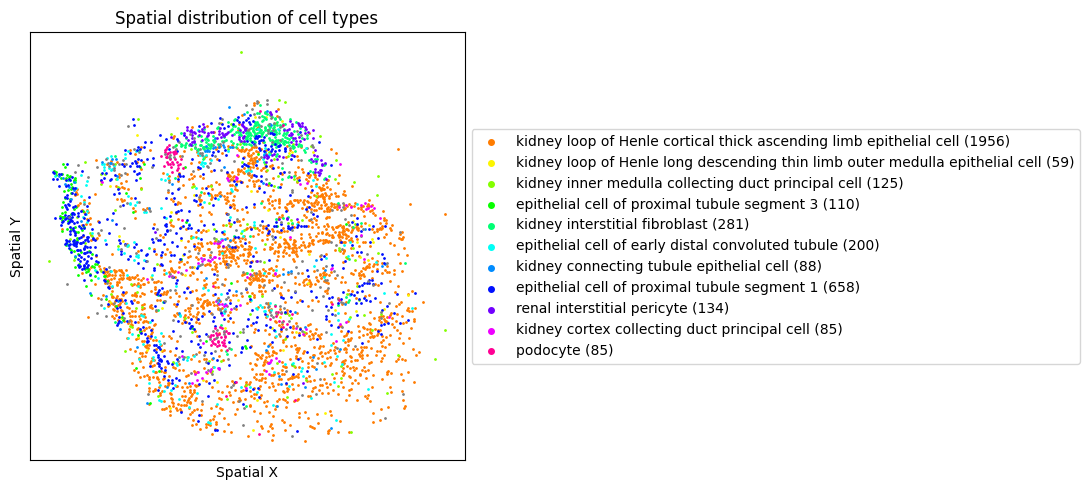

In [10]:
tt1.plot_fov()

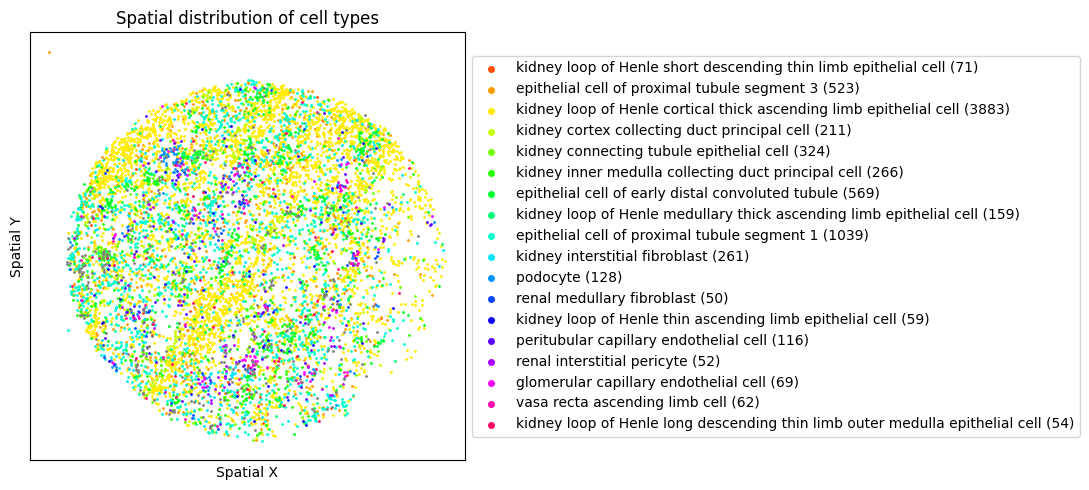

In [11]:
tt2.plot_fov()

In [11]:
# Find frequent patterns around specified cell type
k = 20
min_count = 10
min_support = 0.5
ct = 'kidney interstitial fibroblast'
fp_tree = tt.find_fp_knn(ct=ct, k=k, min_count=min_count, min_support=min_support, dis_duplicates=True)
fp_tree

,support,itemsets
0,0.608856,"[kidney interstitial fibroblast, kidney loop of Henle cortical thick ascending limb epithelial cell]"
1,0.555351,"[kidney loop of Henle cortical thick ascending limb epithelial cell, epithelial cell of proximal tubule segment 1]"
2,0.544280,"[kidney interstitial fibroblast, kidney interstitial fibroblast, kidney interstitial fibroblast]"
3,0.595941,"[kidney loop of Henle cortical thick ascending limb epithelial cell, kidney loop of Henle cortical thick ascending limb epithelial cell, kidney loop of Henle cortical thick ascending limb epithelial cell]"


In [12]:
# Find frequent patterns around specified cell type
k = 20
min_count = 10
min_support = 0.4
ct = 'kidney interstitial fibroblast'
fp_tree = tt.find_fp_knn(ct=ct, k=k, min_count=min_count, min_support=min_support, dis_duplicates=False)
fp_tree

,support,itemsets
0,0.404059,(epithelial cell of early distal convoluted tubule)
1,0.608856,"(kidney loop of Henle cortical thick ascending limb epithelial cell, kidney interstitial fibroblast)"
2,0.555351,"(epithelial cell of proximal tubule segment 1, kidney loop of Henle cortical thick ascending limb epithelial cell)"
3,0.488930,"(epithelial cell of proximal tubule segment 1, kidney interstitial fibroblast)"
4,0.409594,"(renal interstitial pericyte, kidney interstitial fibroblast)"
5,0.418819,"(kidney loop of Henle cortical thick ascending limb epithelial cell, kidney inner medulla collecting duct principal cell)"


In [14]:
max_dist = 100
min_size = 4
min_count = 10
min_support = 0.5
ct = 'kidney interstitial fibroblast'
start_time = time.time()
fp_tree = tt.find_fp_dist(ct=ct, max_dist=max_dist, min_size=min_size, min_count=min_count, 
                          min_support=min_support, dis_duplicates=True)
end_time = time.time()
print(f"Time: {end_time-start_time} seconds")
fp_tree

Time: 0.11612820625305176 seconds


,support,itemsets
0,0.607477,"[kidney interstitial fibroblast, kidney loop of Henle cortical thick ascending limb epithelial cell, kidney interstitial fibroblast]"
1,0.583178,"[kidney loop of Henle cortical thick ascending limb epithelial cell, kidney interstitial fibroblast, epithelial cell of proximal tubule segment 1]"
2,0.575701,"[kidney interstitial fibroblast, kidney interstitial fibroblast, kidney interstitial fibroblast]"
3,0.551402,"[kidney loop of Henle cortical thick ascending limb epithelial cell, kidney loop of Henle cortical thick ascending limb epithelial cell, kidney interstitial fibroblast, kidney loop of Henle cortical thick ascending limb epithelial cell]"


In [14]:
max_dist = 100
min_size = 4
min_count = 10
min_support = 0.4
fp_tree = tt.find_fp_dist(ct=ct, max_dist=max_dist, min_size=min_size, min_count=min_count, 
                          min_support=min_support, dis_duplicates=False)
fp_tree = fp_tree.rename(columns={'itemsets': 'frequent patterns'})
fp_tree

,support,frequent patterns
0,0.583178,"(kidney loop of Henle cortical thick ascending limb epithelial cell, epithelial cell of proximal tubule segment 1, kidney interstitial fibroblast)"
1,0.454206,"(renal interstitial pericyte, kidney interstitial fibroblast)"
2,0.400000,"(kidney interstitial fibroblast, kidney loop of Henle cortical thick ascending limb epithelial cell, kidney inner medulla collecting duct principal cell)"


In [15]:
ct_center = 'kidney interstitial fibroblast'
k = 20
min_support = 0.5
min_count = 10

enrich_res = tt.motif_enrichment_knn(ct=ct_center, k=k, min_support=min_support, min_count=min_count, dis_duplicates=True)
enrich_res

,center,motifs,n_center_motif,n_center,n_motif,p-val
0,kidney interstitial fibroblast,"[kidney interstitial fibroblast, kidney interstitial fibroblast, kidney interstitial fibroblast]",295,181,1110,0.000000e+00
1,kidney interstitial fibroblast,"[kidney interstitial fibroblast, kidney loop of Henle cortical thick ascending limb epithelial cell]",330,542,4183,2.075781e-39
2,kidney interstitial fibroblast,"[epithelial cell of proximal tubule segment 1, kidney loop of Henle cortical thick ascending limb epithelial cell]",301,542,8679,1.000000e+00
3,kidney interstitial fibroblast,"[kidney loop of Henle cortical thick ascending limb epithelial cell, kidney loop of Henle cortical thick ascending limb epithelial cell, kidney loop of Henle cortical thick ascending limb epithelial cell]",323,542,11005,1.000000e+00


In [15]:
ct_center = 'kidney interstitial fibroblast'
max_dist = 100
min_size = 4
min_count = 10
min_support = 0.5

start_time = time.time()
enrich_res = tt.motif_enrichment_dist(ct=ct_center, max_dist=max_dist, min_support=min_support, dis_duplicates=False)
end_time = time.time()
print(f"Time: {end_time-start_time} seconds")
enrich_res

Time: 0.4983389377593994 seconds


,center,motifs,n_center_motif,n_center,n_motif,p-val
0,kidney interstitial fibroblast,"[epithelial cell of proximal tubule segment 1, kidney interstitial fibroblast, kidney loop of Henle cortical thick ascending limb epithelial cell]",312,542,2419,1.655883e-89


In [16]:
ct_center = 'kidney interstitial fibroblast'
max_dist = 100
min_size = 4
min_count = 10
min_support = 0.5

start_time = time.time()
enrich_res = tt.motif_enrichment_dist(ct=ct_center, max_dist=max_dist, min_support=min_support, dis_duplicates=True)
end_time = time.time()
print(f"Time: {end_time-start_time} seconds")
enrich_res

Time: 1.7295360565185547 seconds


,center,motifs,n_center_motif,n_center,n_motif,p-val
0,kidney interstitial fibroblast,"[kidney interstitial fibroblast, kidney interstitial fibroblast, kidney loop of Henle cortical thick ascending limb epithelial cell]",326,271,1279,0.000000e+00
1,kidney interstitial fibroblast,"[kidney interstitial fibroblast, kidney interstitial fibroblast, kidney interstitial fibroblast]",308,181,855,0.000000e+00
2,kidney interstitial fibroblast,"[epithelial cell of proximal tubule segment 1, kidney interstitial fibroblast, kidney loop of Henle cortical thick ascending limb epithelial cell]",312,542,2419,1.655883e-89
3,kidney interstitial fibroblast,"[kidney interstitial fibroblast, kidney loop of Henle cortical thick ascending limb epithelial cell, kidney loop of Henle cortical thick ascending limb epithelial cell, kidney loop of Henle cortical thick ascending limb epithelial cell]",296,542,2634,6.758200e-68
